# Ensaio de Machine Learning #

## 0.0 Import libraries ##

In [69]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn    import tree   as tr
from sklearn    import metrics as mt

## 1.0 load dataset ##

In [27]:
x_train = pd.read_csv('../../dataset/classification/X_training.csv')
y_train = pd.read_csv('../../dataset/classification/Y_training.csv')
x_val = pd.read_csv('../../dataset/classification/X_validation.csv')
y_val = pd.read_csv('../../dataset/classification/y_validation.csv')
x_test = pd.read_csv('../../dataset/classification/X_test.csv')
y_test = pd.read_csv('../../dataset/classification/y_test.csv')

## 2.0 Training Model ##

In [30]:
y_train = y_train.values.ravel()
y_val = y_val.values.ravel()

## Dados de treinamento ##

In [ ]:
m = np.arange( 2, 60, 1)
acc_list = []
precision_list = []
rec_list = []
f1_list = []

for i in m:
    # model definition
    model = tr.DecisionTreeClassifier( max_depth=i )

    # model training
    model.fit ( x_train, y_train )
    
    # model performance
    yhat_train = model.predict( x_train)

    # accuracy
    acc = mt.accuracy_score ( y_train, yhat_train)
    print( 'Accuracy = {}'.format ( acc ))
    acc_list.append( acc )

    # precision
    precision = mt.precision_score( y_train, yhat_train)
    print( 'Precision = {}'.format( precision ))
    precision_list.append( precision )
    
    # recall
    recall = mt.recall_score( y_train, yhat_train)
    print( 'Recall = {}'.format( recall ))
    rec_list.append( recall )
    
    # f1-score
    f1_score = mt.f1_score( y_train, yhat_train)
    print( 'f1-score = {}'.format( f1_score ))
    f1_list.append( f1_score )

In [46]:
# accuracy
acc = mt.accuracy_score ( y_train, yhat_train)
print( 'Accuracy = {}'.format ( acc ))

# precision
precision = mt.precision_score( y_train, yhat_train)
print( 'Precision = {}'.format( precision ))
   
# recall
recall = mt.recall_score( y_train, yhat_train)
print( 'Recall = {}'.format( recall ))
 
# f1-score
f1_score = mt.f1_score( y_train, yhat_train)
print( 'f1-score = {}'.format( f1_score ))

Accuracy = 1.0
Precision = 1.0
Recall = 1.0
f1-score = 1.0


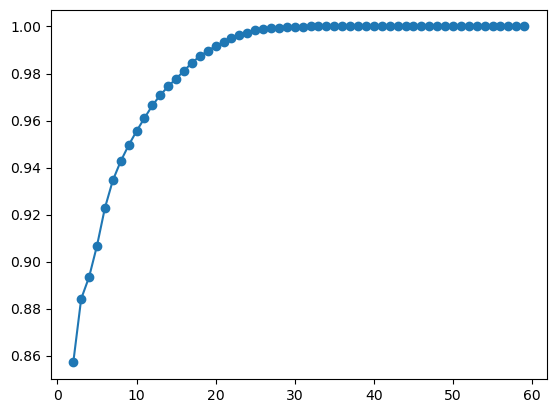

In [47]:
plt.plot( m, acc_list, '-o')

## Dados de validação ##

In [55]:
# Retreinando o modelo com o melhor parâmetro sobre os dados de validação
best_m = acc_list.index( max ( acc_list ) )

# model definition
model = tr.DecisionTreeClassifier( max_depth=m[best_m])

# model training
model.fit ( x_train, y_train )

# model performance
yhat_val = model.predict( x_val)

# accuracy
acc_val = mt.accuracy_score ( y_val, yhat_val)
print( 'Accuracy = {}'.format ( acc_val ))

# precision
precision_val = mt.precision_score( y_val, yhat_val)
print( 'Precision = {}'.format( precision_val ))
    
# recall
recall_val = mt.recall_score( y_val, yhat_val)
print( 'Recall = {}'.format( recall_val ))
    
# f1-score
f1_score_val = mt.f1_score( y_val, yhat_val)
print( 'F1-score = {}'.format( f1_score_val ))

Accuracy = 0.9454293896200007
Precision = 0.9356175534670318
Recall = 0.9386739921300765
F1-score = 0.9371432807056557


## Dados de teste ##

In [60]:
# Retreinando o modelo com o melhor parâmetro sobre os dados de teste
best_m = acc_list.index( max ( acc_list ) )

# model definition
model_tree = tr.DecisionTreeClassifier( max_depth=m[best_m])

# model training
model_tree.fit(np.concatenate( (x_train, x_val) ),
               np.concatenate( (y_train, y_val) ) )

# model performance
y_pred = model_tree.predict( x_test )

# accuracy
acc_test = mt.accuracy_score ( y_test, y_pred)
print( 'Accuracy = {}'.format ( acc_test ))

# precision
precision_test = mt.precision_score( y_test, y_pred)
print( 'Precision = {}'.format( precision_test ))
    
# recall
recall_test = mt.recall_score( y_test, y_pred)
print( 'Recall = {}'.format( recall_test ))
    
# f1-score
f1_score_test = mt.f1_score( y_test, y_pred)
print( 'F1-score = {}'.format( f1_score_test ))

Accuracy = 0.9462402966052601
Precision = 0.9374506535661022
Recall = 0.9402551693796745
F1-score = 0.9388508170795994


C:\Users\uemer\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
